In [54]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import math 
import seaborn as sns # Более продвинутая библиотека для визуализации
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = pd.read_csv('HR.csv')
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


mean - среднее арифметическое;  
std - среднеквадратичное отклонение;  
min - минимальное значение;  
max - максимальное значение;  
50% - медиана (50% квантиль)  

In [56]:
print('моды:')
for column in df.columns:
    print(column, ' -', df[column].mode()[0])

моды:
satisfaction_level  - 0.1
last_evaluation  - 0.55
number_project  - 4
average_montly_hours  - 135
time_spend_company  - 3
Work_accident  - 0
left  - 0
promotion_last_5years  - 0
department  - sales
salary  - low


В столбцах work_accident, left, promotion_last_5years явно значения только 0 и 1(да или нет).

<AxesSubplot:>

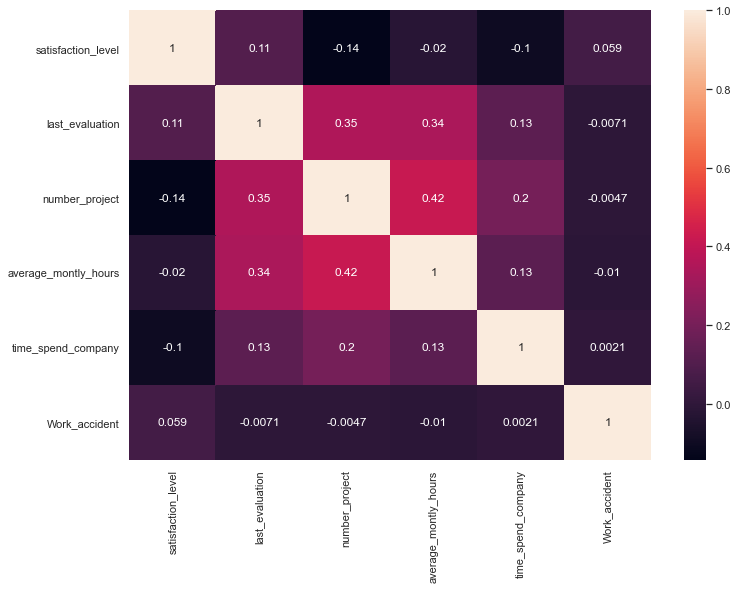

In [57]:
delete = ['department', 'salary','left','promotion_last_5years']
cor = df[[x for x in df.columns if x not in delete]]
cor.corr()
sns.set(rc={'figure.figsize' : (11.7,8.27)})
sns.heatmap(cor.corr(),annot = True,cmap = "rocket" )

Матрица корреляции между стобцами датафрейма, видно что в основном столбцы коррелируют слабо.

In [58]:
a = cor.corr()
b = a.to_dict('index')
c = {}
for el in b.items():
    for key,number in el[1].items():
        if number != 1:
            c[el[0] +' ' + 'и' ' ' + key] = number
c

{'satisfaction_level и last_evaluation': 0.10502121397148496,
 'satisfaction_level и number_project': -0.14296958603689347,
 'satisfaction_level и average_montly_hours': -0.020048113219473,
 'satisfaction_level и time_spend_company': -0.10086607257796937,
 'satisfaction_level и Work_accident': 0.05869724105198205,
 'last_evaluation и satisfaction_level': 0.10502121397148496,
 'last_evaluation и number_project': 0.349332588516267,
 'last_evaluation и average_montly_hours': 0.3397417998383588,
 'last_evaluation и time_spend_company': 0.13159072244765974,
 'last_evaluation и Work_accident': -0.007104288519605422,
 'number_project и satisfaction_level': -0.14296958603689347,
 'number_project и last_evaluation': 0.349332588516267,
 'number_project и average_montly_hours': 0.4172106344017606,
 'number_project и time_spend_company': 0.19678589126379795,
 'number_project и Work_accident': -0.0047405477197704155,
 'average_montly_hours и satisfaction_level': -0.020048113219473,
 'average_montly

словарь, где двум столбцам соответствует их уровень корреляции, убран уровень корреляции столбцов с самими собой

In [59]:
print({x: y for x, y in filter(lambda x: c[x[0]] == max(c.values()), c.items())})
print({x: y for x, y in filter(lambda x: c[x[0]] == min(c.values()), c.items())})

{'number_project и average_montly_hours': 0.4172106344017606, 'average_montly_hours и number_project': 0.4172106344017606}
{'satisfaction_level и number_project': -0.14296958603689347, 'number_project и satisfaction_level': -0.14296958603689347}


два наиболее скоррелированных столбца: количество проектов и среднее количество часов работы в месяц    
два наименее скоррелированных столбца: уровень удовлетворенности и количество проектов    

In [60]:
data = df[df.left == 0]
workers = data[['department','satisfaction_level' ]].groupby('department').count()
workers.columns = ['workers_count']
workers

,workers_count
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


Таблица, показывающая количество работников в каждом отделе

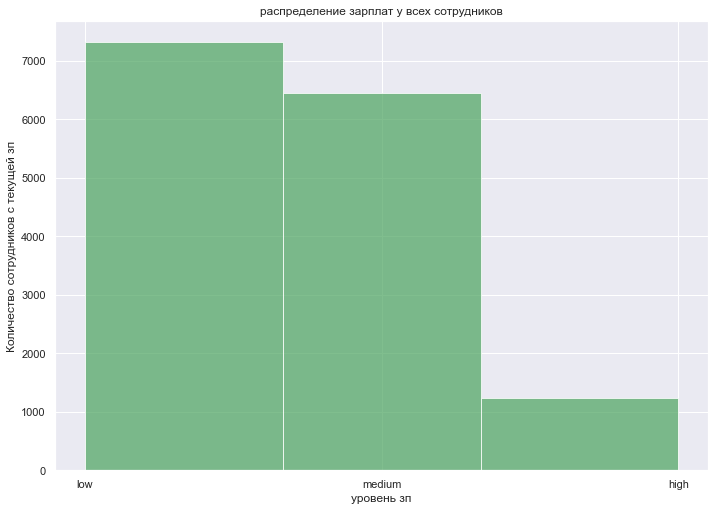

In [61]:
salary = df[['salary']]



plt.figure()
plt.hist(salary,bins = 3 , facecolor='g', alpha=0.75)
plt.xlabel('уровень зп')
plt.ylabel('Количество сотрудников с текущей зп')
plt.title('распределение зарплат у всех сотрудников')
plt.grid(True)
plt.show()

Заметно что средних и низких зарплат примерно одинаково, а высоких сильно меньше. 

Text(0.5, 1.0, 'распределение зарплат у сотрудников по отделам')

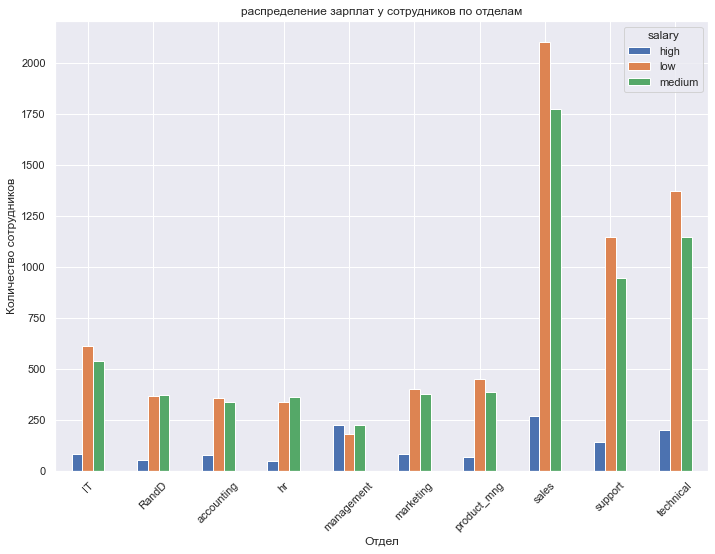

In [70]:
salary_1 = df.groupby(['department', 'salary'])['satisfaction_level'].count()
salary_1.unstack().plot(kind='bar', rot=45, stacked=False)
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.title('распределение зарплат у сотрудников по отделам')

В отделе Sales работает сильно больше сотрудников чем в остальных отеделах, распределение зарплат в отделах очень похоже на общее распределение зарплат по сотрудникам, за исключением отдела managment

In [10]:
A = df[df.salary == 'low'][['average_montly_hours']]
B = df[df.salary == 'high'][['average_montly_hours']]
F, p = scipy.stats.ttest_ind(a = A,b = B, equal_var = False)
print(p)


[0.44590455]


с учетом высокого p-value мы не можем принять нашу гипотезу о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [11]:
fired = df[df.left == 1]
work = df[df.left == 0]
a = work[work.promotion_last_5years == 1]['left'].count()/work['left'].count()
print('доля сотрудников с повышением за последние 5 лет среди работающих:', round(a,3) )
b = work['satisfaction_level'].mean()
print('Средняя степень удовлетворенности среди работающих:', round(b,2))
c =  work['number_project'].mean()
print('Среднее количество проектов среди работающих:', round(c,2))
e = fired[fired.promotion_last_5years == 1]['left'].count()/fired['left'].count()
print('доля сотрудников с повышением за последние 5 лет среди уволившихся:', round(e,3) )
d = fired['satisfaction_level'].mean()
print('Средняя степень удовлетворенности среди уволившихся:', round(d,2))
f =  fired['number_project'].mean()
print('Среднее количество проектов среди уволившихся:', round(f,2))

доля сотрудников с повышением за последние 5 лет среди работающих: 0.026
Средняя степень удовлетворенности среди работающих: 0.67
Среднее количество проектов среди работающих: 3.79
доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005
Средняя степень удовлетворенности среди уволившихся: 0.44
Среднее количество проектов среди уволившихся: 3.86


Опираясь на наши данные, можно преположить:   
1)увольняются люди с низким уровнем удовлетворенности;  
2)люди с повышением за последние 5 лет редко увольняются;  
3)количество проектов не влияет на увольнение

In [12]:
np.random.seed(42)
delete_1  = ['department', 'salary','left']
data = df[[x for x in df.columns if x not in delete_1]]
target = df['left'].array
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

можно сказать что эффективность модели не очень высокая(порядка 75%), другие разделения на обучающую и тестовую выборку дает примерно похожий результат, а значит наших данных недостаточно, чтобы построить эффективную модель.